Sine Tone Generation

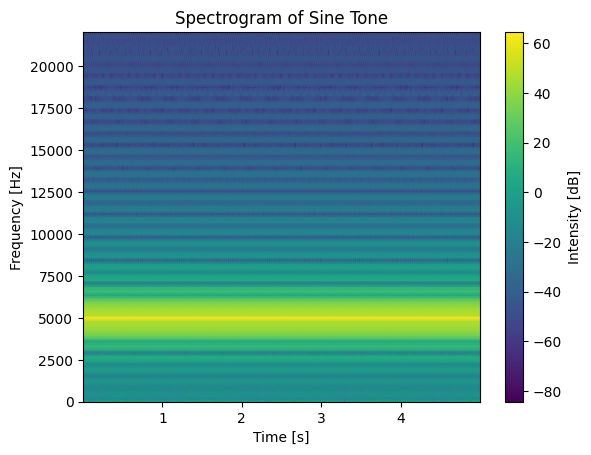

In [9]:
import numpy as np # Used for array operations
import scipy.io.wavfile as wav # Allows the reading and writing of WAV files
import matplotlib.pyplot as plt # Used to visualize spectrogram
from scipy.signal import spectrogram # Used to compute spectrogram

# Parameters
sampling_rate = 44100  # Sampling rate (Hz)
duration = 5  # Duration of the sine tone (seconds)
frequency = 5000  # Frequency of the sine tone (Hz)

# Time array
# The sine wave is polled at each moment in time
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sine wave
sine_wave = np.sin(2 * np.pi * frequency * t)

# Normalize to 16-bit range
# Ensures that the sine wave generates within a range that 
# can be sampled
sine_wave *= 32767 / np.max(np.abs(sine_wave))

# Convert to 16-bit integers
sine_wave = sine_wave.astype(np.int16)

# Save to WAV file
wav.write("SineTrack1.wav", sampling_rate, sine_wave)

# Compute spectrogram
frequencies, times, Sxx = spectrogram(sine_wave, sampling_rate)

# Plot spectrogram
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of Sine Tone')
plt.colorbar(label='Intensity [dB]')
plt.show()

Chirp Signal

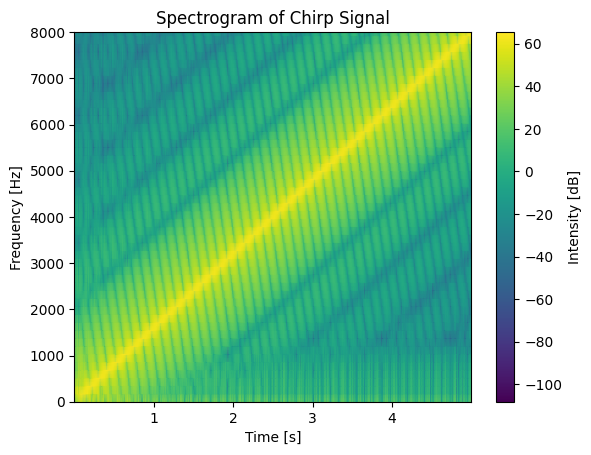

In [39]:
import numpy as np # Used for array operations
import scipy.io.wavfile as wav # Allows the reading and writing of WAV files
import matplotlib.pyplot as plt # Used to visualize spectrogram
from scipy.signal import spectrogram # Used to compute spectrogram

# Parameters
sampling_rate = 44100  # Sampling rate (Hz)
duration = 5  # Duration of the sine tone (seconds)
startFrequency = 0
endFrequency = 8000

# Generate time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Initialize an empty array to store the sine wave
sine_wave = np.zeros_like(t)

# Generate sine wave with linearly increasing frequency
for i, time in enumerate(t):
    frequency = (endFrequency - startFrequency) * time / duration + startFrequency
    sine_wave[i] = np.sin(np.pi * frequency * time)

# Normalize to 16-bit range
# Ensures that the sine wave generates within a range that 
# can be sampled
sine_wave *= 32767 / np.max(np.abs(sine_wave))

# Convert to 16-bit integers
sine_wave = sine_wave.astype(np.int16)

# Save to WAV file
wav.write("Chirp1.wav", sampling_rate, sine_wave)

# Compute spectrogram
frequencies, times, Sxx = spectrogram(sine_wave, sampling_rate)

# Plot spectrogram
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of Chirp Signal')
plt.colorbar(label='Intensity [dB]')
plt.ylim(0, 8000)
plt.show()

Close Encounters

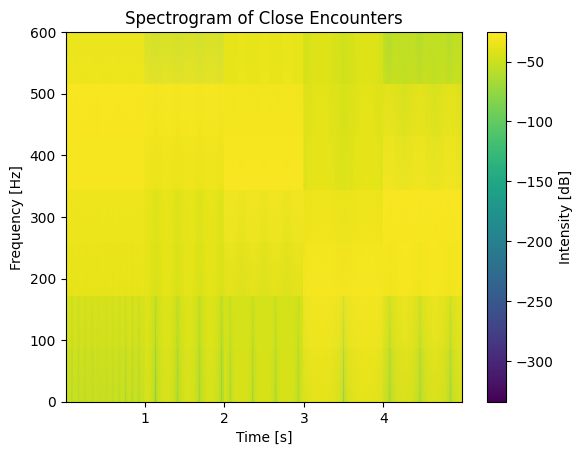

In [38]:
import numpy as np
import sounddevice as sd
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Parameters
sampling_rate = 44100  # Sampling rate (Hz)
duration_per_tone = 1  # Duration of each sine tone (seconds)
duration = 5  # Total duration of the sine tone sequence (seconds)
tone1 = 440  # A4
tone2 = 494  # B4
tone3 = 392  # G4
tone4 = 196  # G3
tone5 = 294  # D4
tones = [tone1, tone2, tone3, tone4, tone5]

# Generate time array for each tone
t_per_tone = np.linspace(0, duration_per_tone, int(sampling_rate * duration_per_tone), endpoint=False)

# Generate and concatenate sine tones
sine_wave_sequence = np.array([])
for tone in tones:
    # Generate sine wave for current tone
    sine_wave_per_tone = np.sin(2 * np.pi * tone * t_per_tone)

    # Normalize to fit in the range [-1, 1] for audio playback
    sine_wave_per_tone /= np.max(np.abs(sine_wave_per_tone))

    # Concatenate the sine wave to the sequence
    sine_wave_sequence = np.concatenate((sine_wave_sequence, sine_wave_per_tone))

# Save the sine tone sequence to a WAV file
wav.write("CloseEncounters.wav", sampling_rate, (sine_wave_sequence * 32767).astype(np.int16))

# Compute spectrogram
frequencies, times, Sxx = spectrogram(sine_wave_sequence, sampling_rate)

# Plot spectrogram
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of Close Encounters')
plt.colorbar(label='Intensity [dB]')
plt.ylim(0, 600)
plt.show()
